In [2]:
from pipeline.pipeline_tools import (
    prepare_data,
    regressor_uncertainty,
    select_unstable_data,
    retrain_regressor,
    uncertainty_change,
    mse_change,
)
from pipeline.Models import ITGDatasetDF, load_model, ITGDataset
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader
from scripts.utils import train_keys
import copy
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import yaml 

ModuleNotFoundError: No module named 'tqdm'

In [2]:
with open('pipeline_config.yaml') as f:
    cfg = yaml.load(f, Loader=yaml.FullLoader)

pretrained = cfg['pretrained']
paths = cfg['data']

In [3]:
train_data, val_data = prepare_data(
    paths['train'], paths['validation'], target_column="efiitg_gb", target_var="itg"
)

scaler = StandardScaler()
scaler.fit_transform(train_data.drop(["itg"], axis=1))

train_dataset = ITGDatasetDF(train_data, target_column="efiitg_gb", target_var="itg")
valid_dataset = ITGDatasetDF(val_data, target_column="efiitg_gb", target_var="itg")

# # TODO: further testing of the scale function
train_dataset.scale(scaler)
valid_dataset.scale(scaler)

In [4]:
# Load pretrained models
print("Loaded the following models:\n")
models = {}
for model in pretrained:
    if pretrained[model]["trained"] == True:
        trained_model = load_model(model, pretrained[model]["save_path"])
        models[model] = trained_model

Loaded the following models:



In [5]:
# TODO: Needs to be the true training samples used!!!
train_sample = train_dataset.sample(10_000)


Iteration: 0


Running Classifier...



  0%|          | 0/100 [00:00<?, ?it/s]


Getting Regressor Uncertainties...



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]


Getting Regressor Predictions...


Retraining Regressor...



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]


Getting Regressor Predictions...



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]


Novel Data Uncertainty changes...


Training Data Uncertainty changes...

10580

Iteration: 1


Running Classifier...



  0%|          | 0/100 [00:00<?, ?it/s]


Getting Regressor Uncertainties...



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]


Getting Regressor Predictions...


Retraining Regressor...



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]


Getting Regressor Predictions...



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]


Novel Data Uncertainty changes...


Training Data Uncertainty changes...

11173

Iteration: 2


Running Classifier...



  0%|          | 0/100 [00:00<?, ?it/s]


Getting Regressor Uncertainties...



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]


Getting Regressor Predictions...


Retraining Regressor...



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]


Getting Regressor Predictions...



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]


Novel Data Uncertainty changes...


Training Data Uncertainty changes...

11751

Iteration: 3


Running Classifier...



  0%|          | 0/100 [00:00<?, ?it/s]


Getting Regressor Uncertainties...



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]


Getting Regressor Predictions...


Retraining Regressor...



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]


Getting Regressor Predictions...



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]


Novel Data Uncertainty changes...


Training Data Uncertainty changes...

12342


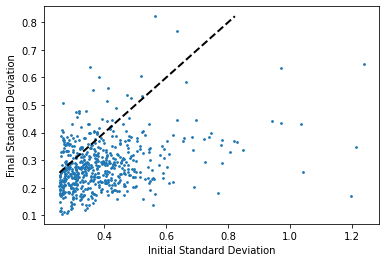

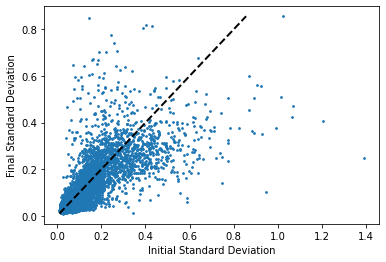

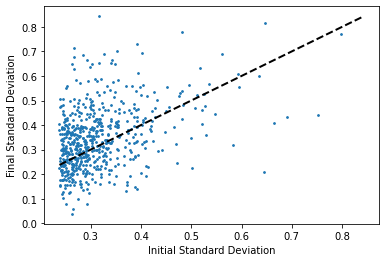

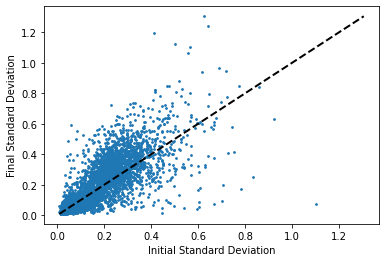

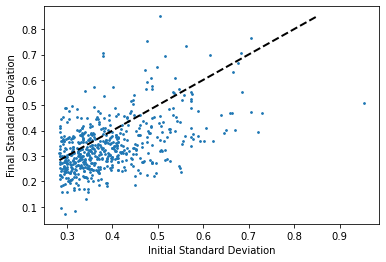

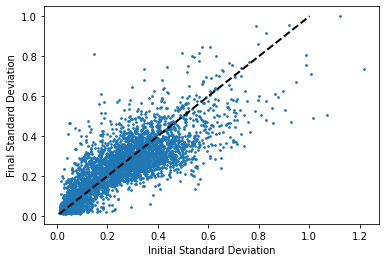

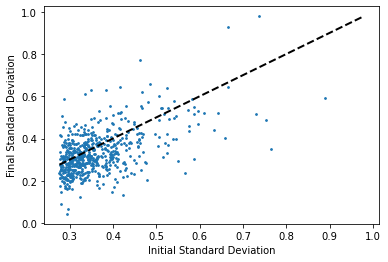

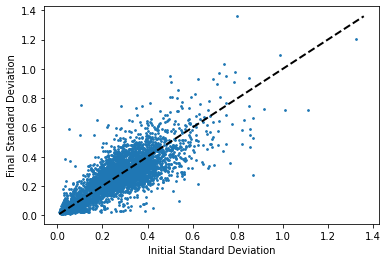

In [6]:
init_epoch = 25
iterations = 4

train_losses = []
test_losses = []
n_train_points = []
mse_before = []
mse_after = []
d_mse = []
d_train_uncert = []

for i in range(iterations):
    print(f"\nIteration: {i}\n")
    valid_sample = valid_dataset.sample(10_000)

    # remove the sampled data points from the dataset
    valid_dataset.remove(valid_sample.data.index)
    
    print("\nRunning Classifier...\n")

    select_unstable_data(valid_sample, batch_size=100, classifier=models["ITG_class"])
    
    print("\nGetting Regressor Uncertainties...\n")

    uncertain_datset, uncert_before, data_idx = regressor_uncertainty(
    valid_sample, models["ITG_reg"], n_runs=15, keep=0.25,valid_dataset=valid_dataset
)
    train_sample_origin, train_uncert_before, train_uncert_idx = regressor_uncertainty(
        train_sample, models["ITG_reg"], n_runs=15,train_data=True,
        )

    train_sample.add(uncertain_datset)

    uncertain_loader = DataLoader(train_sample, batch_size=len(train_sample), shuffle=True)
    
    print("\nGetting Regressor Predictions...\n")

    prediction_before, prediction_idx_order = models["ITG_reg"].predict(uncertain_loader)

    # Switching validation dataset to numpy arrays to see if it is quicker
    x_array = valid_dataset.data[train_keys].values
    y_array = valid_dataset.data["itg"].values
    z_array = valid_dataset.data["efiitg_gb"].values
    dataset_numpy = ITGDataset(x_array, y_array, z_array)
    valid_loader = DataLoader(
        dataset_numpy, batch_size=int(0.1 * len(y_array)), shuffle=True
    )

    # Retrain Regressor (Further research required)
    print("\nRetraining Regressor...\n")
    epochs = init_epoch * (i+1)
    train_loss, test_loss = retrain_regressor(
        uncertain_loader,
        valid_loader,
        models["ITG_reg"],
        learning_rate=1e-3,
        epochs=epochs,
        validation_step=True,
        lam = 0.6
    )

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    print("\nGetting Regressor Predictions...\n")
    
    prediction_after,_ = models["ITG_reg"].predict(uncertain_loader, prediction_idx_order)

    _, uncert_after,_ = regressor_uncertainty(valid_sample, models["ITG_reg"], n_runs=15, keep=0.25, order_idx=data_idx)
    _, train_uncert_after,_ = regressor_uncertainty(train_sample_origin, models["ITG_reg"], n_runs=15,order_idx=train_uncert_idx, train_data=True)
   
    print("\nNovel Data Uncertainty changes...\n")
    _ = uncertainty_change(x=uncert_before, y=uncert_after, plot_title='Novel data',iteration=i)

    print("\nTraining Data Uncertainty changes...\n")
    
    d_train_uncert.append(uncertainty_change(x=train_uncert_before, y=train_uncert_after, plot_title='Train data', iteration=i))
    
    _ = mse_change(prediction_before, prediction_after,prediction_idx_order,data_idx, uncertain_loader,[uncert_before, uncert_after])

    train_mse_before, train_mse_after, delta_mse = mse_change(
    prediction_before,
    prediction_after,
    prediction_idx_order,
    train_uncert_idx,
    uncertain_loader,
    uncertainties=[train_uncert_before, train_uncert_after],
    data="train"
     )
    mse_before.append(train_mse_before)
    mse_after.append(train_mse_after)
    d_mse.append(delta_mse)
    print(len(prediction_idx_order))
    n_train_points.append(len(prediction_idx_order))

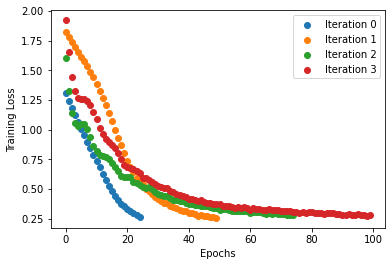

In [7]:
plt.figure()
for i in range(len(train_losses)):
    plt.scatter(np.arange(0,len(train_losses[i])), train_losses[i], label =f"Iteration {i}");
    plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Training Loss");
plt.savefig("SP_training_loss.png", dpi = 300)

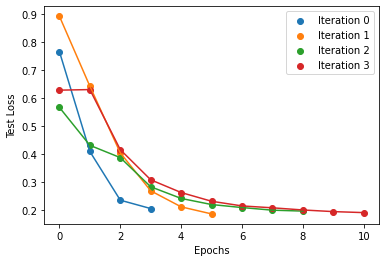

In [8]:
plt.figure()
for i in range(len(test_losses)):
    plt.plot(np.arange(0,len(test_losses[i])), test_losses[i]);
    plt.scatter(np.arange(0,len(test_losses[i])), test_losses[i], label = f"Iteration {i}");
    
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Test Loss");
plt.savefig("SP_test_loss.png", dpi = 300)

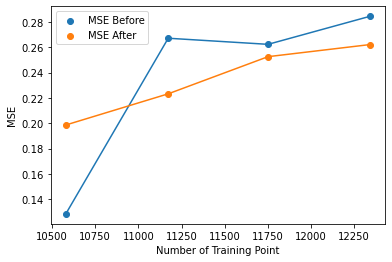

In [22]:
plt.figure()
plt.plot(n_train_points,mse_before)
plt.scatter(n_train_points,mse_before, label = "MSE Before")
plt.plot(n_train_points,mse_after)
plt.scatter(n_train_points,mse_after, label = "MSE After")
plt.xlabel("Number of Training Point")
plt.ylabel("MSE");
plt.legend()
plt.savefig("MSE_change.png", dpi =300)

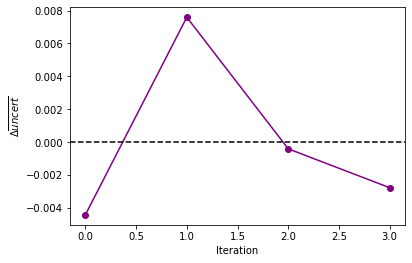

In [48]:
plt.figure()
plt.plot(np.arange(0,len(d_train_uncert)),d_train_uncert, c='purple')
plt.scatter(np.arange(0,len(d_train_uncert)),d_train_uncert, c='purple')
plt.axhline(y=0.0, color='black', linestyle='--')
plt.xlabel("Iteration")
plt.ylabel(r"$\Delta \overline{uncert}$");
plt.savefig("train_uncert_change.png", dpi =300)